In [1]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('alinefinal.csv')

#check if there is any missing value
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            2522 non-null   int64  
 1   hadm_id               2522 non-null   int64  
 2   icustay_id            2522 non-null   int64  
 3   age                   2522 non-null   float64
 4   gender                2522 non-null   object 
 5   day_icu_intime        2522 non-null   object 
 6   hour_icu_intime       2522 non-null   int64  
 7   OUTCOME_icu_exp_flag  2522 non-null   int64  
 8   OUTCOME_day_28_flag   2522 non-null   int64  
 9   aline_flag            2522 non-null   int64  
 10  aline_time_day        2522 non-null   float64
 11  weight_first          2445 non-null   float64
 12  height_first          897 non-null    float64
 13  bmi                   897 non-null    float64
 14  service_unit          2521 non-null   object 
 15  sofa_first           

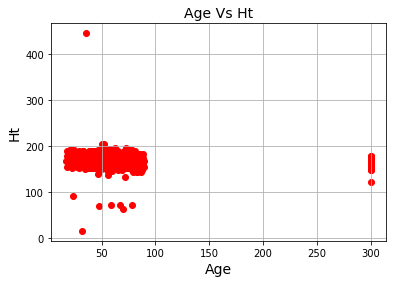

In [3]:
# For linear regression to estimate height

import pandas as pd
import matplotlib.pyplot as plt

df_data = pd.read_csv('alinefinal_ht.csv')

# Check linearity between variables -> note the anomaly
plt.scatter(df_data['age'], df_data['height_first'], color='red')
plt.title('Age Vs Ht', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Ht', fontsize=14)
plt.grid(True)
plt.show()

In [9]:
# OLS Linear Regression

import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

df_data = pd.read_csv('alinefinal_ht.csv')

# convert gender to binary (M - 1, F - 0)
df_data2 = df_data.join(pd.get_dummies(df_data.pop('gender')))

X = df_data2[['age','M','weight_first']] 
Y = df_data2['bmi']
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.982
Date:                Fri, 26 Jun 2020   Prob (F-statistic):              0.115
Time:                        22:13:38   Log-Likelihood:                 2527.9
No. Observations:                 897   AIC:                            -5048.
Df Residuals:                     893   BIC:                            -5029.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.777e-05      0.002     -0.050   

In [17]:
df_data2['bmi'].describe()

count    897.000000
mean       0.003433
std        0.014505
min        0.000815
25%        0.002325
50%        0.002683
75%        0.003152
max        0.434431
Name: bmi, dtype: float64

In [16]:
df_data2['height_first'].describe()

count    897.000000
mean     169.868517
std       17.076515
min       15.240000
25%      162.560000
50%      170.180000
75%      177.800000
max      444.500000
Name: height_first, dtype: float64

# Data Statistics for height, weight and bmi

In [5]:
import pandas as pd

df = pd.read_csv('Aline ht_wt_bmi.csv')
df.isnull().values.any()

False

In [6]:
df.shape

(897, 3)

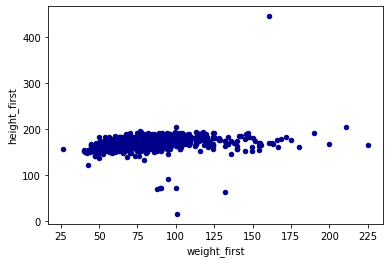

In [7]:
ax1 = df.plot.scatter(x='weight_first',
                      y='height_first',
                      c='DarkBlue')

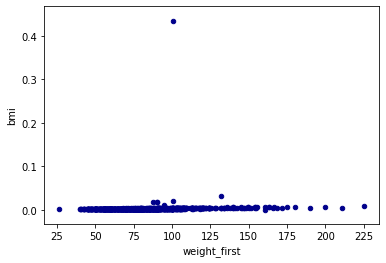

In [8]:
ax2 = df.plot.scatter(x='weight_first',
                      y='bmi',
                      c='DarkBlue')

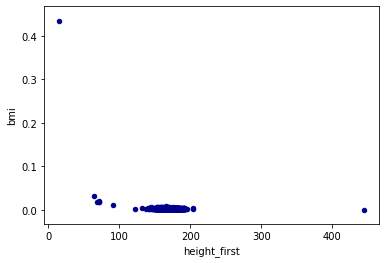

In [9]:
ax3 = df.plot.scatter(x='height_first',
                      y='bmi',
                      c='DarkBlue')

In [14]:
df["height_first"].describe()

count    897.000000
mean     169.868517
std       17.076515
min       15.240000
25%      162.560000
50%      170.180000
75%      177.800000
max      444.500000
Name: height_first, dtype: float64

In [19]:
df["weight_first"].describe()

count    889.000000
mean      82.726659
std       24.965063
min       26.600000
25%       66.700000
50%       79.000000
75%       94.000000
max      225.000000
Name: weight_first, dtype: float64

In [20]:
# Removed height, weight anomalies

df = pd.read_csv('Aline ht_wt_bmi.csv')

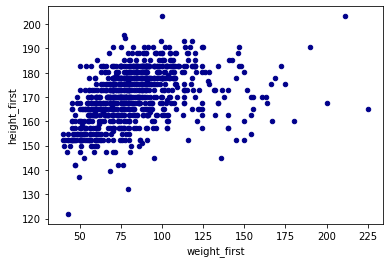

In [21]:
ax4 = df.plot.scatter(x='weight_first',
                      y='height_first',
                      c='DarkBlue')

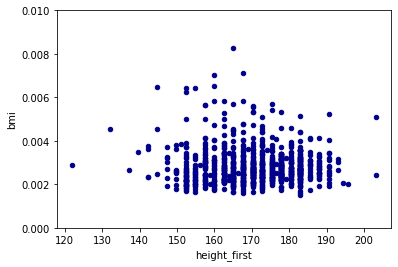

In [27]:
ax6 = df.plot(ylim = (0,0.01),
              kind ='scatter', 
              x='height_first',
              y='bmi',
              c='DarkBlue')

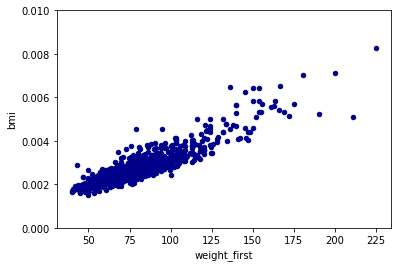

In [25]:
# bmi = weight/height^2

ax5 = df.plot(ylim = (0,0.01),
              kind ='scatter', 
              x='weight_first',
              y='bmi',
              c='DarkBlue')

In [28]:
from sklearn import linear_model
import statsmodels.api as sm

X = df['weight_first'] 
Y = df['bmi']
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

# R^2 = 0.805, but we are missing weight and bmi. 
# There shouldn't be much correlation between weight/bmi vs height according to the scatter plot.

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     3663.
Date:                Sat, 18 Jul 2020   Prob (F-statistic):          5.46e-317
Time:                        21:41:07   Log-Likelihood:                 5783.1
No. Observations:                 888   AIC:                        -1.156e+04
Df Residuals:                     886   BIC:                        -1.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004   4.19e-05      9.859   